<a href="https://colab.research.google.com/github/omkar1kadam/2ndHandCarPriceprediction/blob/main/Car_prize_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Normalization,Dense,InputLayer
from tensorflow.keras.losses import MeanSquaredError,Huber ,MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError,MeanAbsolutePercentageError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [ ]:
data = pd.read_csv("train.csv", sep=",")
# data.head()
data.shape

(1000, 12)

In [ ]:
# sns.pairplot(data[['v.id', 'on road old', 'on road now', 'years', 'km', 'rating',
#                    'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']],diag_kind="kde")


In [ ]:
tensor_data = tf.constant(data)
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data)

tf.Tensor(
[[7.550000e+02 6.239720e+05 7.346570e+05 ... 8.500000e+01 1.110000e+02
  1.930670e+05]
 [2.940000e+02 5.095800e+05 7.688830e+05 ... 6.000000e+01 7.900000e+01
  1.775095e+05]
 [9.200000e+02 5.218590e+05 7.079390e+05 ... 6.700000e+01 8.100000e+01
  2.235945e+05]
 ...
 [2.740000e+02 5.628350e+05 8.837600e+05 ... 1.060000e+02 1.180000e+02
  1.677940e+05]
 [4.400000e+02 6.139750e+05 8.141260e+05 ... 7.200000e+01 1.230000e+02
  4.197130e+05]
 [9.460000e+02 5.084830e+05 7.886510e+05 ... 7.100000e+01 1.240000e+02
  2.427095e+05]], shape=(1000, 12), dtype=float64)


In [ ]:
X = tensor_data[:,3:-1]
y = tensor_data[:,-1]
y = tf.expand_dims(y,axis = -1)
print(X.shape)
print(y.shape)

(1000, 8)
(1000, 1)


In [ ]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

DATASET_SIZE = len(X)

# Split the data
X_train = X[:int(DATASET_SIZE * TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE * TRAIN_RATIO)]

X_val = X[int(DATASET_SIZE * TRAIN_RATIO):int(DATASET_SIZE * (TRAIN_RATIO + VAL_RATIO))]
y_val = y[int(DATASET_SIZE * TRAIN_RATIO):int(DATASET_SIZE * (TRAIN_RATIO + VAL_RATIO))]

X_test = X[int(DATASET_SIZE * (TRAIN_RATIO + VAL_RATIO)):]
y_test = y[int(DATASET_SIZE * (TRAIN_RATIO + VAL_RATIO)):]

# Check the shapes to confirm everything is correct
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (800, 8)
y_train shape: (800, 1)
X_val shape: (100, 8)
y_val shape: (100, 1)
X_test shape: (100, 8)
y_test shape: (100, 1)


In [ ]:
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X_train)
# normalizer(X)  # this builds the layer!

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(8,)),              # Step 1
    tf.keras.layers.Normalization(),                           # Step 2
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(1),
])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_10                │ (None, 8)              │            17 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

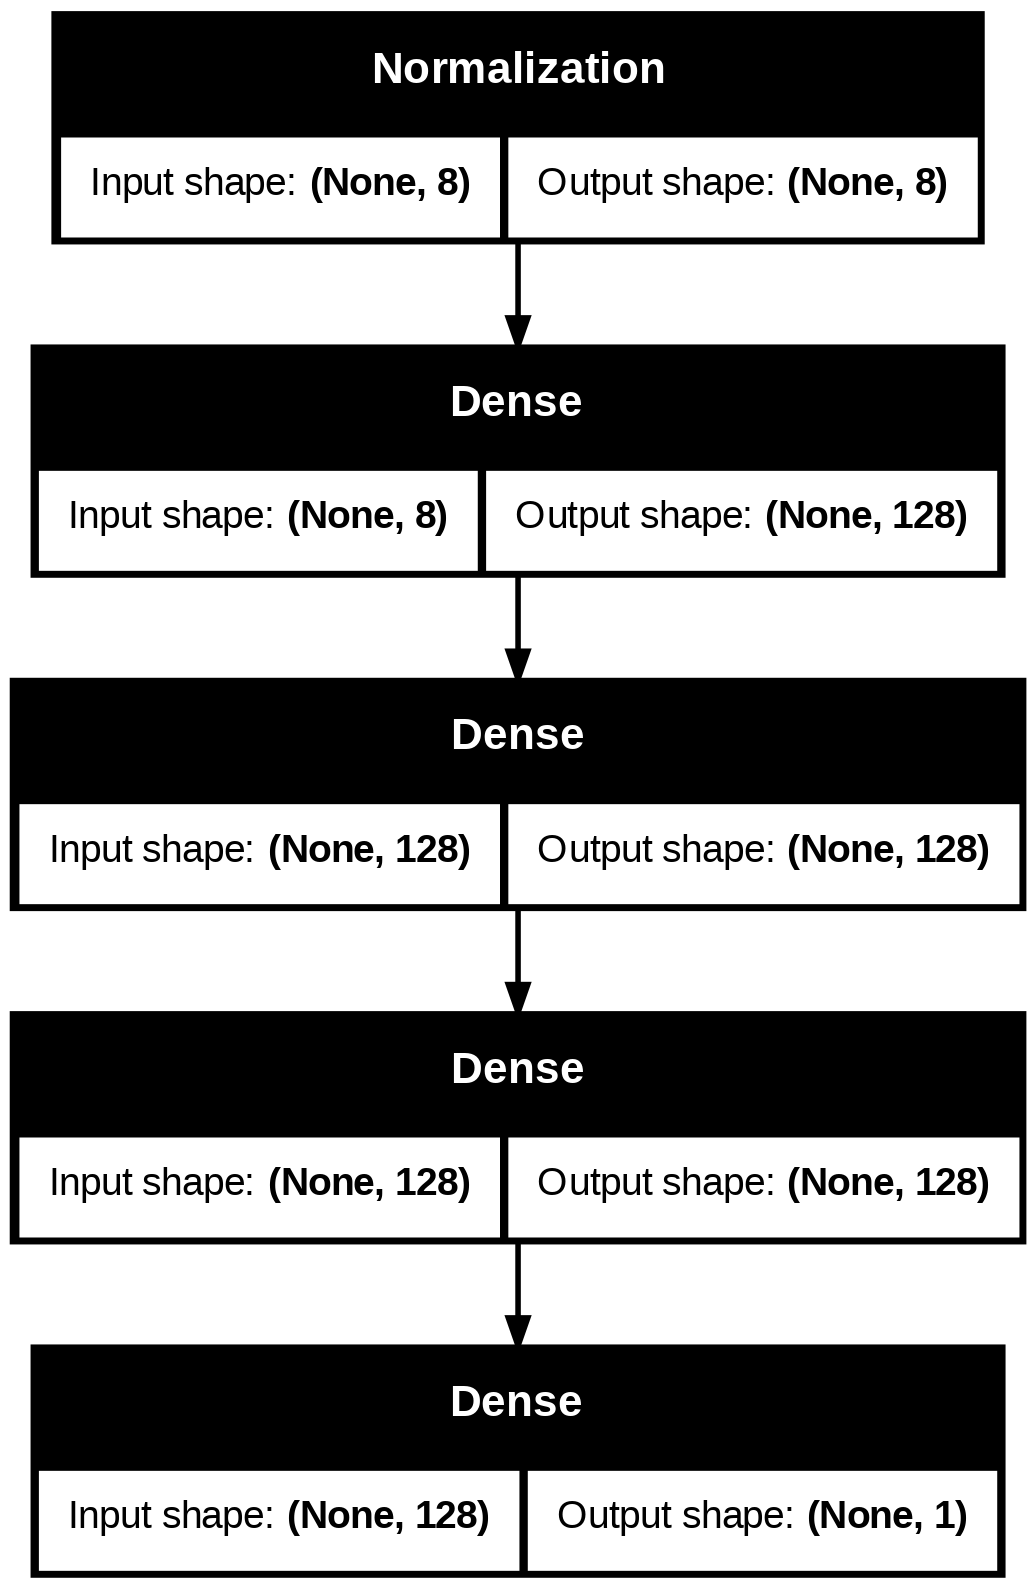

In [ ]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

In [ ]:
model.compile(
    optimizer = Adam(learning_rate=0.1),  # safer value
    loss = MeanAbsoluteError(),
    metrics = [RootMeanSquaredError()]
)

In [ ]:
history = model.fit(train_dataset, validation_data = val_dataset,epochs = 100,verbose = 1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 563021.3125 - root_mean_squared_error: 1017068.8750 - val_loss: 176932.3438 - val_root_mean_squared_error: 225542.9062
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 190032.2656 - root_mean_squared_error: 229390.1094 - val_loss: 172690.3438 - val_root_mean_squared_error: 219771.6719
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 184734.9375 - root_mean_squared_error: 222044.6875 - val_loss: 170815.4219 - val_root_mean_squared_error: 217282.2656
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 185387.7188 - root_mean_squared_error: 223541.9844 - val_loss: 165745.2344 - val_root_mean_squared_error: 203118.6562
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 174688.7656 - root_mean_squared_error: 210458.8438 - val_loss: 162763.8438 - val_root_mean_squared_error: 193586.0781
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 165328.9219 - root_mean_squared_error: 199432.5938 - v

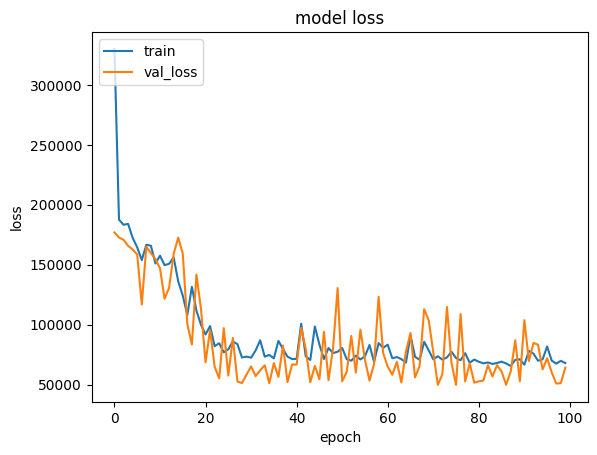

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val_loss'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 65328.2031 - root_mean_squared_error: 81531.7734 


[63057.60546875, 78650.609375]

In [ ]:
X_test.shape

TensorShape([100, 8])

In [ ]:
model.predict(tf.expand_dims(X_test[0],axis = 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


array([[229277.6]], dtype=float32)

In [ ]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([232192.])>

In [ ]:
y_true = list(y_test[:,0].numpy())

In [ ]:
y_pred = list(model.predict(X_test)[:,0])
print(y_pred[0])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
229277.58


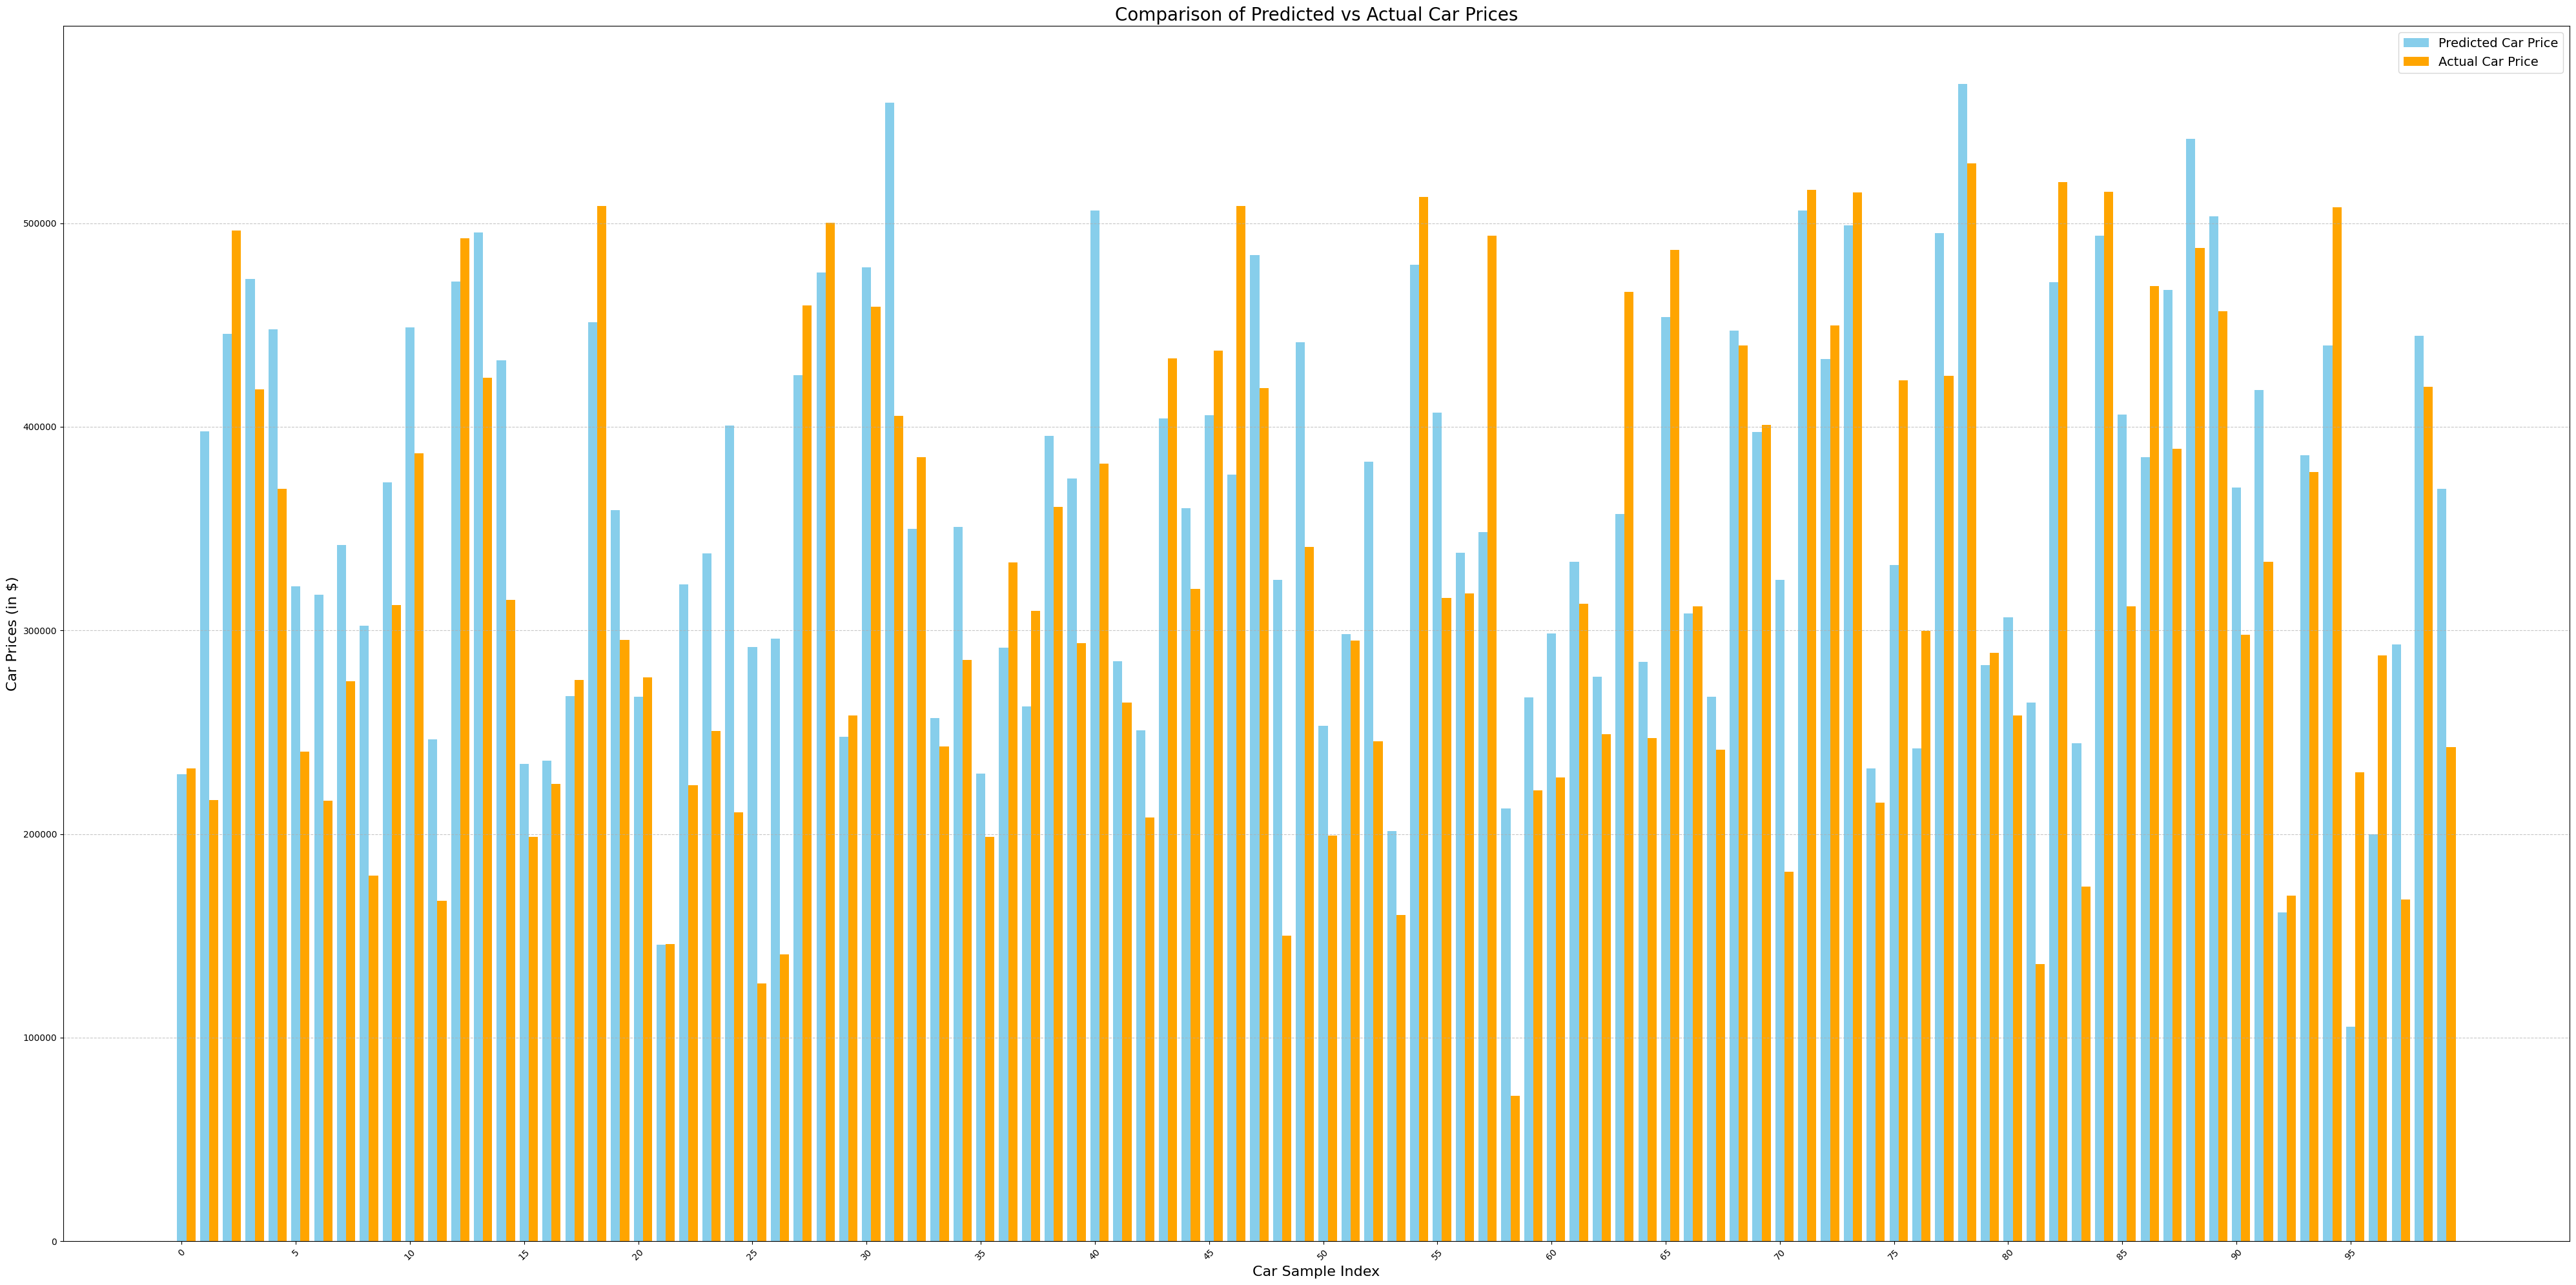

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
ind = np.arange(100)
plt.figure(figsize=(40, 20))
width = 0.4
plt.bar(ind, y_pred, width, label='Predicted Car Price', color='skyblue')
plt.bar(ind + width, y_true, width, label='Actual Car Price', color='orange')
plt.xlabel('Car Sample Index', fontsize=16)
plt.ylabel('Car Prices (in $)', fontsize=16)
plt.title('Comparison of Predicted vs Actual Car Prices', fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right', fontsize=14)
plt.xticks(ind[::5], rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
testin = 90

In [ ]:
y_test[testin]

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([298023.])>

In [ ]:
y_pred = list(model.predict(X_test)[:,0])
print(y_pred[testin])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
370107.16
